### Welcome to the Russian Airlines Air traffic model Mock Case Study!
Recently air-traffic control in Russia has expressed concerns over not having clear visibility with respect to which airports are the most busy/most idle.

The core reason this task is being undertaken is for the Russian Airspace Control to have an improved understanding of the traffic flows for the airports scattered across Russia.

As a data analyst, I've been tasked with analysing the data at hand and providing key trends/insights back to Management with an view on which airports are the most busy/idle.
The core reason Management is interested in this is that they have recently started developing 'Virus Action Plans" and wants to better understand which airports will likely have the most traffic over time.



### Let's get started!


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import  statsmodels.api as sm
%matplotlib inline

In [2]:
df=pd.read_csv('russian_passenger_air_service.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3961 entries, 0 to 3960
Data columns (total 16 columns):
Airport name           3961 non-null object
Year                   3961 non-null int64
January                3961 non-null float64
February               3961 non-null float64
March                  3961 non-null float64
April                  3961 non-null float64
May                    3961 non-null float64
June                   3961 non-null float64
July                   3961 non-null float64
August                 3961 non-null float64
September              3961 non-null float64
October                3961 non-null float64
November               3961 non-null float64
December               3961 non-null float64
Whole year             3961 non-null float64
Airport coordinates    3961 non-null object
dtypes: float64(13), int64(1), object(2)
memory usage: 495.2+ KB


In [5]:
df.head()
data=df.copy()

##checking nulls

In [5]:
df.isna().sum()

Airport name           0
Year                   0
January                0
February               0
March                  0
April                  0
May                    0
June                   0
July                   0
August                 0
September              0
October                0
November               0
December               0
Whole year             0
Airport coordinates    0
dtype: int64

### Traffic summary by Year  using pivot 

In [6]:
pivot_df = pd.pivot_table(data, index = "Year", values = "Whole year", aggfunc = sum)
pivot_df

,Whole year
Year,
2007,659438.23
2008,664682.46
2009,560809.77
2010,693033.98
2011,818691.71
2012,846388.03
2013,792337.08
2014,729457.12
2015,630208.97


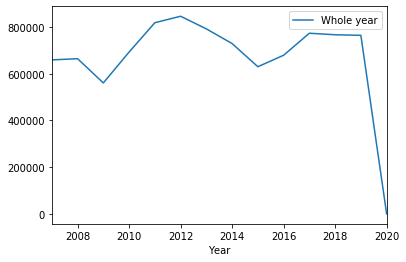

In [7]:
pivot_df.plot();

### Lets check in what month usually have largest air traffic.

In [6]:
#lets melt the data
long = data.melt(id_vars = ['Airport name', 'Year'],
         value_vars = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December'])

long.rename(columns = {'variable':'month', 'value':'air traffic'}, inplace = True)

In [7]:

months = ['January', 'February', 'March', 'April', 'May','June', 'July', 'August', 'September', 'October', 'November','December']
long['month'] = pd.Categorical(long['month'], categories=months, ordered=True)

In [8]:
long


,Airport name,Year,month,air traffic
0,Abakan,2020,January,43.58
1,Aikhal,2020,January,0.00
2,Loss,2020,January,0.00
3,Amderma,2020,January,0.00
4,Anadyr (Carbon),2020,January,122.00
...,...,...,...,...
47527,Yakutsk,2007,December,1916.60
47528,Yakutsk (Magan),2007,December,0.00
47529,Yamburg,2007,December,8.87
47530,Yaroslavl (Tunoshna),2007,December,2055.60


In [11]:
long.groupby('Airport name')['air traffic'].mean().sort_values(ascending=False).head()

Airport name
Moscow (Sheremetyevo)         18053.655952
Moscow (Domodedovo)           10612.711786
Moscow (Vnukovo)               3085.414762
Saint Petersburg (Pulkovo)     1941.892857
Vladivostok (Knevichi)         1882.233214
Name: air traffic, dtype: float64

In [12]:
long.groupby('Airport name')['air traffic'].mean().sort_values(ascending=True).head()

Airport name
Nyagan                   0.0
Rogachevo (Amderma-2)    0.0
Rostov-on-Don (fee)      0.0
SUV                      0.0
Sabetta                  0.0
Name: air traffic, dtype: float64

In [13]:
per_year = long.groupby('Year')['air traffic'].sum()/1000000
per_year = per_year.reset_index()
per_year

,Year,air traffic
0,2007,0.659438
1,2008,0.664682
2,2009,0.560810
3,2010,0.693034
4,2011,0.818692
5,2012,0.846388
6,2013,0.792337
7,2014,0.729457
8,2015,0.630209
9,2016,0.679370


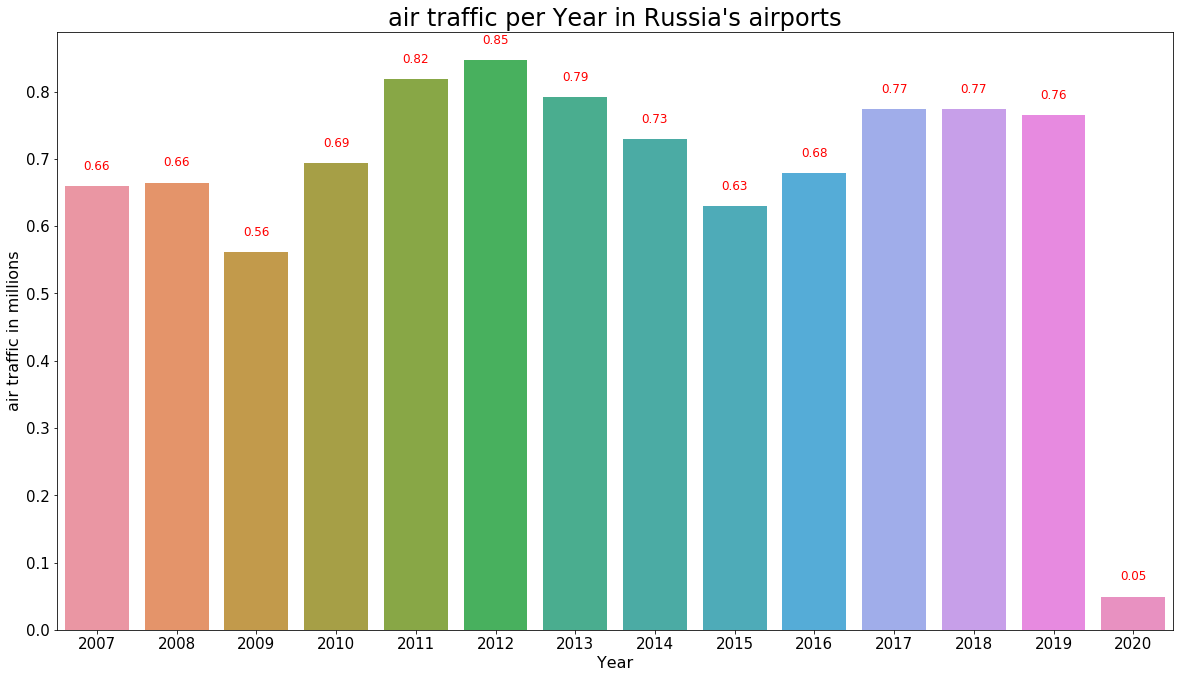

In [14]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = per_year, x = 'Year', y = 'air traffic')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('air traffic in millions', fontsize = 16)
plt.title("air traffic per Year in Russia's airports", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='red', xytext=(0, 20),
                 textcoords='offset points')


In [45]:


#lets look at per month passenger flow in millions
per_month = long.groupby('month')['air traffic'].sum()/1000000
per_month = per_month.reset_index()
per_month

,month,air traffic
0,January,0.580183
1,February,0.646357
2,March,0.763514
3,April,0.777944
4,May,0.771738
5,June,0.757709
6,July,0.771631
7,August,0.817733
8,September,0.842504
9,October,0.890607


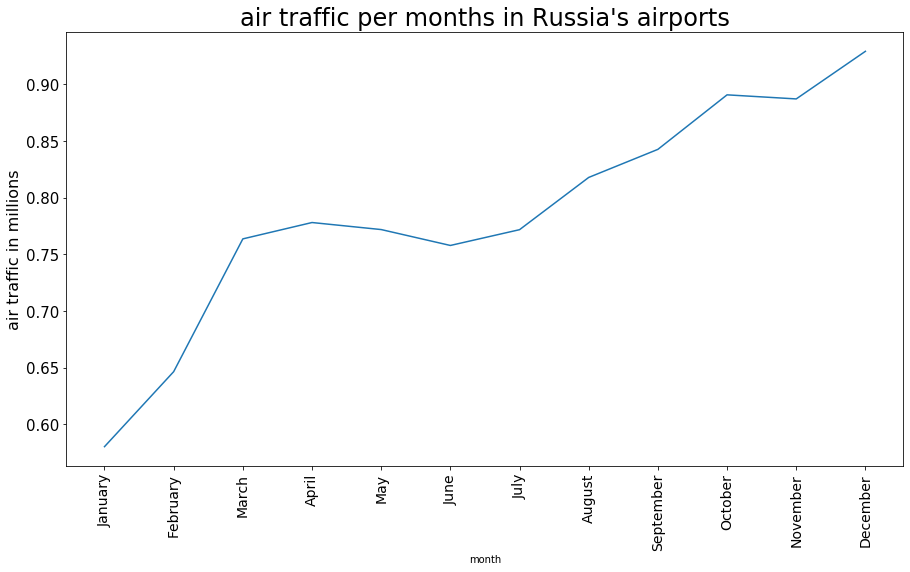

In [46]:
plt.figure(figsize=(15,8))


ax=sns.lineplot(data = per_month, x = 'month', y = 'air traffic')
plt.xlabel('month', fontsize = 10)
plt.ylabel('air traffic in millions', fontsize = 16)
plt.title("air traffic per months in Russia's airports", fontsize = 24)

plt.yticks(fontsize=15);
plt.xticks(rotation=90,fontsize=14)

for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=8, color='red', xytext=(0, 10),
                 textcoords='offset points')

#lets find passengers per airport in millions

In [17]:


per_airport = long.groupby('Airport name')['air traffic'].sum()/1000000
per_airport = per_airport.reset_index()

#filtering for all ariports thats great than zero passengers
per_airport=per_airport[per_airport['air traffic']>0]



In [18]:
#lets look at total passengers so far
sumall=long['air traffic'].sum()/1000000
round(sumall,2)

9.44

In [19]:
top_10=per_airport.sort_values(by='air traffic', ascending=False).head(10)
top_10

,Airport name,air traffic
118,Moscow (Sheremetyevo),3.033014
116,Moscow (Domodedovo),1.782936
119,Moscow (Vnukovo),0.518350
184,Saint Petersburg (Pulkovo),0.326238
255,Vladivostok (Knevichi),0.316215
78,Khabarovsk (New),0.290726
145,Novosibirsk (Tolmachyovo),0.280129
44,Ekaterinburg (Koltsovo),0.260016
138,Norilsk,0.202874
161,Peaceful,0.200762


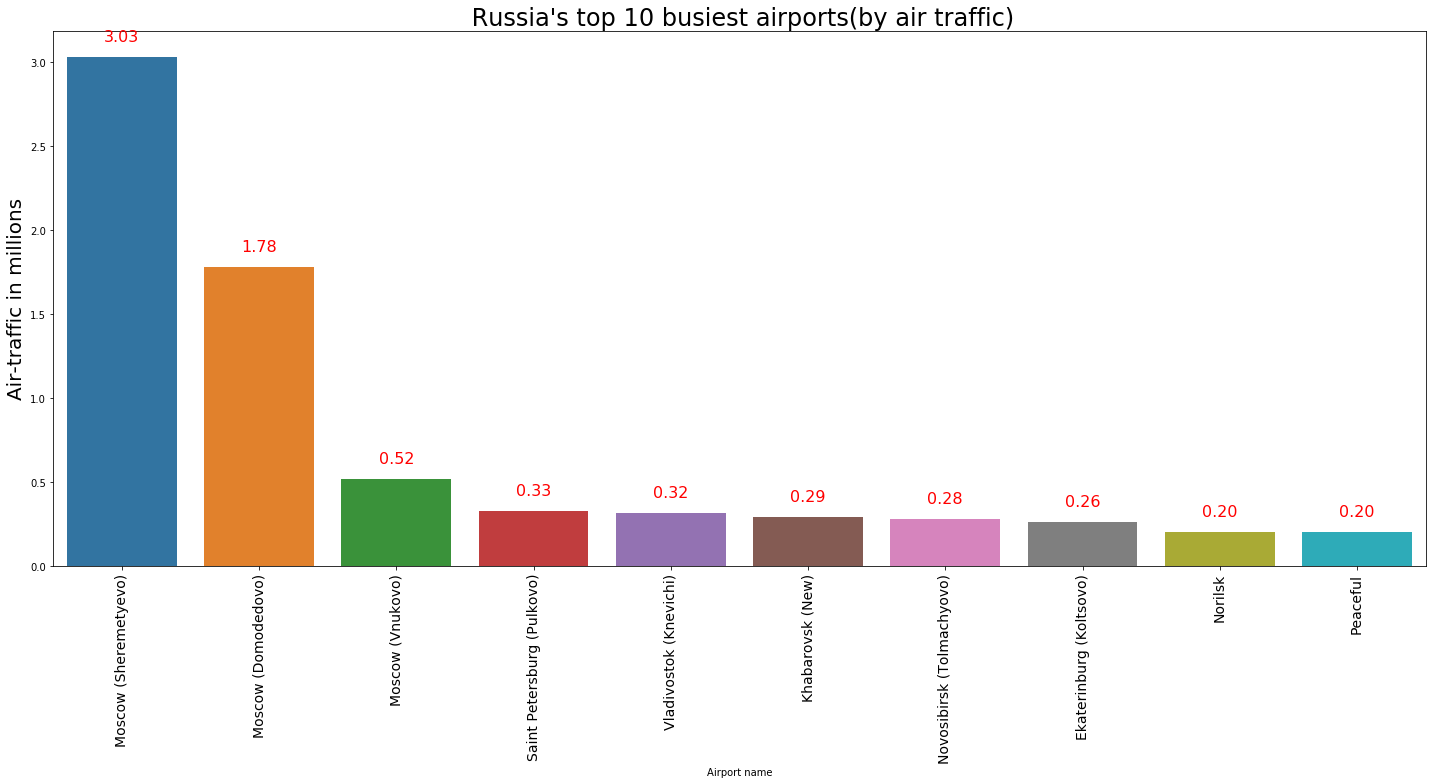

In [20]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = top_10, x = 'Airport name', y = 'air traffic')
plt.xticks(rotation=90,fontsize=14)

plt.ylabel('Air-traffic in millions', fontsize = 20)
plt.title(" Russia's top 10 busiest airports(by air traffic)", fontsize = 24)
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')


In [52]:

t = long.groupby('Airport name')['air traffic'].sum()
t = t.reset_index()

#filtering for all ariports thats great than zero passengers

t5=t.sort_values(by='air traffic', ascending=False).head(5)
t5

,Airport name,air traffic
118,Moscow (Sheremetyevo),3033014.20
116,Moscow (Domodedovo),1782935.58
119,Moscow (Vnukovo),518349.68
184,Saint Petersburg (Pulkovo),326238.00
255,Vladivostok (Knevichi),316215.18


In [21]:
per_airport1 = long.groupby('Airport name')['air traffic'].sum()
per_airport1 = per_airport1.reset_index()
#filtering for all ariports thats great than passengers  between 1% and 5%
per_airport1=per_airport1[(per_airport1['air traffic']>0 )& (per_airport1['air traffic']<94400)]



per_airport1


,Airport name,air traffic
0,Abakan,13835.20
4,Anadyr,27490.12
5,Anadyr (Carbon),1868.76
6,Anapa (Vitjazevo),8372.87
9,Arkhangelsk (Talagy),40005.82
...,...,...
271,Zabaykalsk,12010.21
272,Zeyskaya,19.41
276,brand,130.00
282,red,874.07


In [22]:
#filtering for most idle airports
per_airport2 = long.groupby('Airport name')['air traffic'].sum()
per_airport2 = per_airport2.reset_index()
#filtering for all ariports thats great than zero passengers
per_airport2=per_airport2[per_airport2['air traffic']==0 ]



per_airport2

,Airport name,air traffic
1,Achinsk,0.0
2,Aikhal,0.0
3,Amderma,0.0
7,Antypayuta,0.0
8,Apatite (Khibiny),0.0
...,...,...
293,Лешуконское,0.0
294,Мотыгино,0.0
295,Нюрба,0.0
296,Среднеколымск,0.0


In [23]:
last_10=per_airport1.sort_values(by='air traffic', ascending=True).head(10)
last_10

,Airport name,air traffic
247,Ust-Tsilma,0.27
160,Pauline Osipenko,1.82
23,Bogorodskoe,3.19
196,Shakhtars'k,3.39
46,Ekimçan,3.43
68,Kaluga,4.37
99,Kursk (Eastern),4.40
191,Saransk,4.77
56,Herpuchi,6.19
198,Shushenskoe,6.42


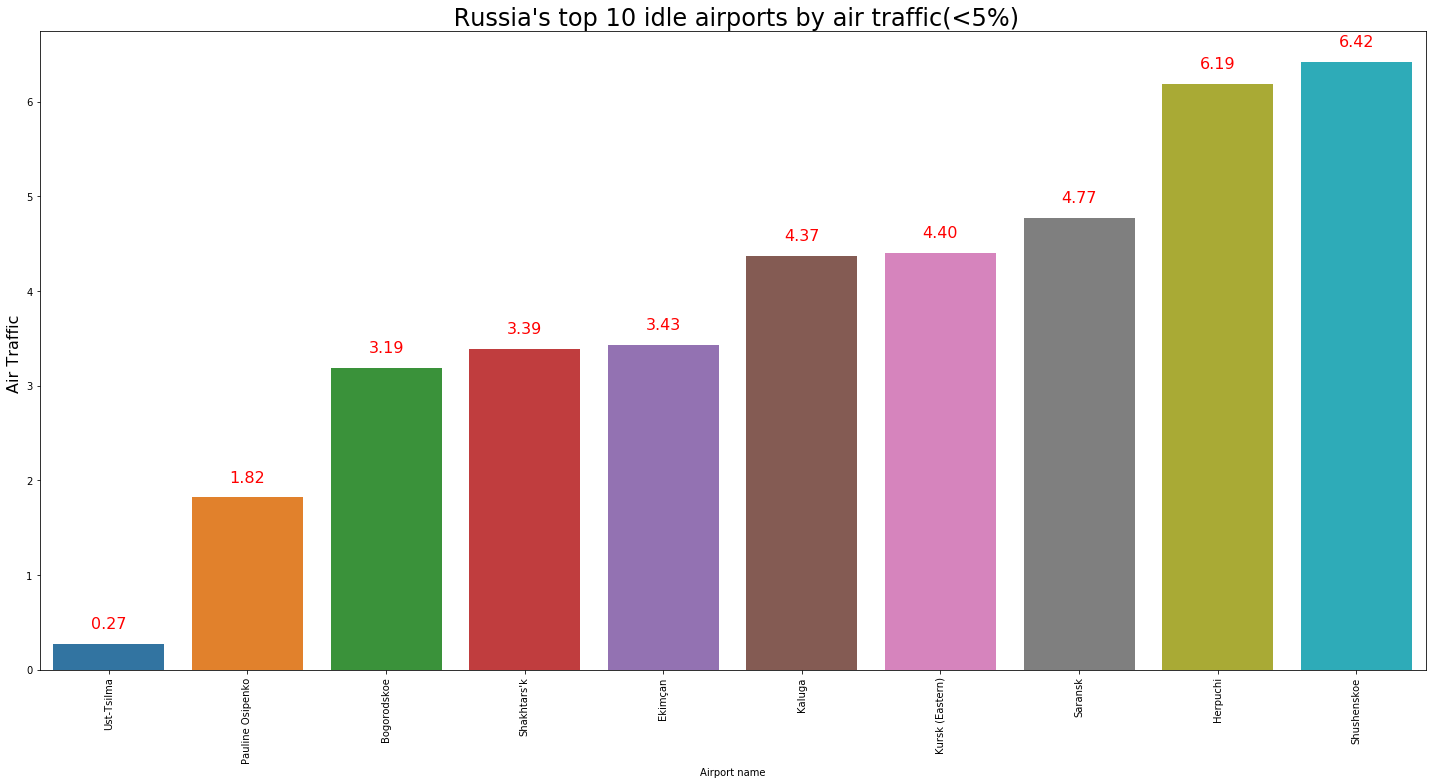

In [38]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = last_10, x = 'Airport name', y = 'air traffic')
plt.xticks(rotation=90)
plt.title(" Russia's top 10 idle airports by air traffic(<5%)", fontsize = 24)
plt.ylabel('Air Traffic ', fontsize = 16)
plt.tight_layout()
for p in ax.patches:
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')


In [ ]:

ax = sns.boxplot(data=iris, orient="h", palette="Set2")

In [25]:
df_sh = long[long['Airport name']=='Moscow (Sheremetyevo)']
df_do = long[long['Airport name']=='Moscow (Domodedovo)']
df_vn = long[long['Airport name']=='Moscow (Vnukovo)']
df_sh


,Airport name,Year,month,air traffic
103,Moscow (Sheremetyevo),2020,January,23251.2
353,Moscow (Sheremetyevo),2019,January,19422.8
601,Moscow (Sheremetyevo),2018,January,21304.8
876,Moscow (Sheremetyevo),2017,January,18438.6
1168,Moscow (Sheremetyevo),2016,January,13905.9
...,...,...,...,...
46199,Moscow (Sheremetyevo),2011,December,25305.0
46491,Moscow (Sheremetyevo),2010,December,23507.5
46783,Moscow (Sheremetyevo),2009,December,15628.0
47075,Moscow (Sheremetyevo),2008,December,12942.3


In [26]:
df_join=pd.concat([df_sh,df_do,df_vn],join='inner')
df_join

,Airport name,Year,month,air traffic
103,Moscow (Sheremetyevo),2020,January,23251.20
353,Moscow (Sheremetyevo),2019,January,19422.80
601,Moscow (Sheremetyevo),2018,January,21304.80
876,Moscow (Sheremetyevo),2017,January,18438.60
1168,Moscow (Sheremetyevo),2016,January,13905.90
...,...,...,...,...
46196,Moscow (Vnukovo),2011,December,3929.37
46488,Moscow (Vnukovo),2010,December,3869.24
46780,Moscow (Vnukovo),2009,December,3073.45
47072,Moscow (Vnukovo),2008,December,2502.84


In [27]:
join_yr = df_join.groupby('Year')['air traffic'].sum()/1000000
join_yr = join_yr.reset_index()
join_yr
join_mo=df_join.groupby('month')['air traffic'].sum()/1000000
join_mo = join_mo.reset_index()

In [28]:
for field in list(top_10['Airport name'].unique()):
    dfield=long[long['Airport name']==field]
    print("Percentage of "+ str(field) + " is {:.1f}%  ".format(
    dfield['air traffic'].sum()/ long['air traffic'].sum()*100))

Percentage of Moscow (Sheremetyevo) is 32.1%  
Percentage of Moscow (Domodedovo) is 18.9%  
Percentage of Moscow (Vnukovo) is 5.5%  
Percentage of Saint Petersburg (Pulkovo) is 3.5%  
Percentage of Vladivostok (Knevichi) is 3.4%  
Percentage of Khabarovsk (New) is 3.1%  
Percentage of Novosibirsk (Tolmachyovo) is 3.0%  
Percentage of Ekaterinburg (Koltsovo) is 2.8%  
Percentage of Norilsk is 2.2%  
Percentage of Peaceful is 2.1%  


In [29]:
# initialize list of lists 
dt1 = [['Moscow (Sheremetyevo)', 32.1], ['Moscow (Domodedovo)', 18.9], ['Moscow (Vnukovo)', 5.5],['Saint Petersburg (Pulkovo)', 3.5],
     ['Vladivostok (Knevichi)', 3.4],['Khabarovsk (New)',3.1],['Novosibirsk (Tolmachyovo)',3.0],['Ekaterinburg (Koltsovo)',2.8],
     ['Percentage of Norilsk',2.2],['Peaceful',2.1],['Others',23.4]]
  
# Create the pandas DataFrame 
dt1 = pd.DataFrame(dt1, columns = ['Airport name', '% of Total air traffic']) 
  
# print dataframe. 
print(dt1)
dt1['% of Total air traffic'].sum()

                  Airport name  % of Total air traffic
0        Moscow (Sheremetyevo)                    32.1
1          Moscow (Domodedovo)                    18.9
2             Moscow (Vnukovo)                     5.5
3   Saint Petersburg (Pulkovo)                     3.5
4       Vladivostok (Knevichi)                     3.4
5             Khabarovsk (New)                     3.1
6    Novosibirsk (Tolmachyovo)                     3.0
7      Ekaterinburg (Koltsovo)                     2.8
8        Percentage of Norilsk                     2.2
9                     Peaceful                     2.1
10                      Others                    23.4


100.0

### All 3 Moscow airports makeup for majority(56.5%) of passenger traffic in Russia

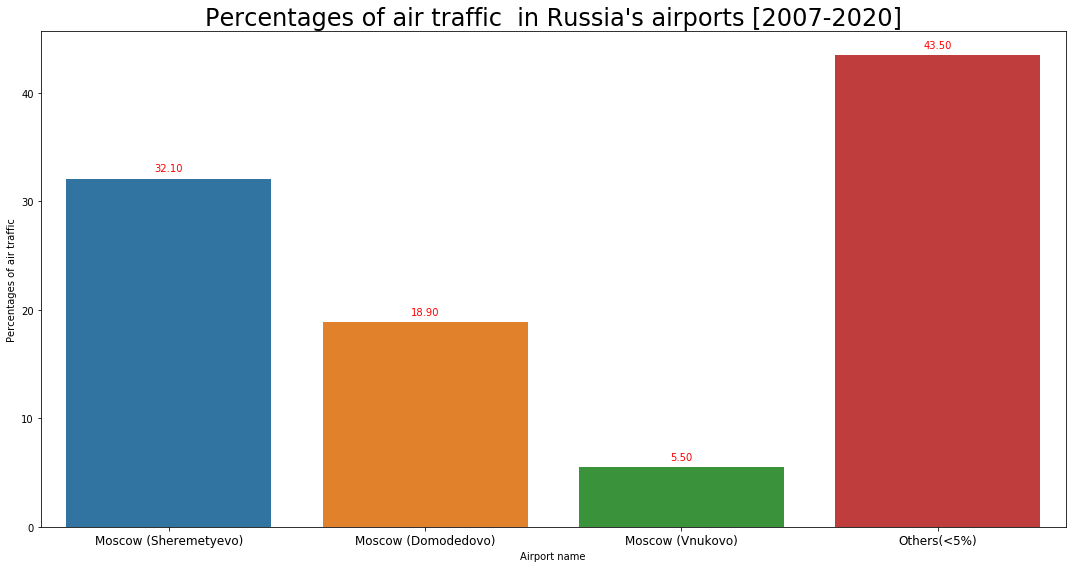

In [30]:
# initialize list of lists 
dt = [['Moscow (Sheremetyevo)', 32.1], ['Moscow (Domodedovo)', 18.9], ['Moscow (Vnukovo)', 5.5],['Others(<5%)', 43.5]] 
  
# Create the pandas DataFrame 
dt = pd.DataFrame(dt, columns = ['Airport name', '% of Total Traffic']) 
  
# print dataframe. 
dt
plt.figure(figsize=(15,8))

ax=sns.barplot(data = dt, x = 'Airport name', y = '% of Total Traffic')
plt.xticks(rotation=0,fontsize=12)
plt.title("Percentages of air traffic  in Russia's airports [2007-2020]", fontsize = 24)
plt.ylabel('Percentages of air traffic', fontsize = 10)
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=10, color='red', xytext=(0, 10),
                 textcoords='offset points')

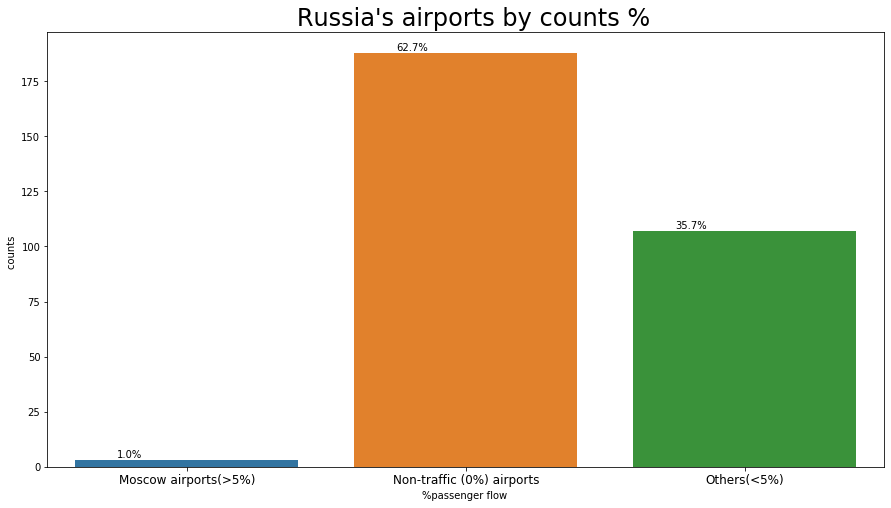

In [31]:
# initialize list of lists 
combo = [['Moscow airports(>5%)', 3], ['Non-traffic (0%) airports', 188],['Others(<5%)', 107]] 
  
# Create the pandas DataFrame 
combo = pd.DataFrame(combo, columns = ['Airport name', 'counts']) 
  
# print dataframe. 
combo

fig, ax = plt.subplots(1,1,figsize=(15,8))
ax=sns.barplot(data = combo, x = 'Airport name', y = 'counts')
plt.xticks(rotation=0,fontsize=12)
plt.title("   Russia's airports by counts % ", fontsize = 24)
plt.ylabel('counts  ', fontsize = 10)
plt.xlabel('%passenger flow ', fontsize = 10)


total=len(combo)
for p in ax.patches:
        ax.annotate('{:.1f}%'.format(p.get_height()/(total)), (p.get_x()+0.15, p.get_height()+1))
    
    
  
   
    

In [32]:

per_yr=df_sh.groupby('Year')['air traffic'].sum()
per_yr=per_yr.reset_index()



per_mo=df_sh.groupby('month')['air traffic'].sum()
per_mo = per_mo.reset_index()
per_mo


,month,air traffic
0,January,206097.5
1,February,196004.5
2,March,252766.9
3,April,247473.7
4,May,247531.7
5,June,243871.3
6,July,250156.7
7,August,259798.8
8,September,268857.7
9,October,287287.1


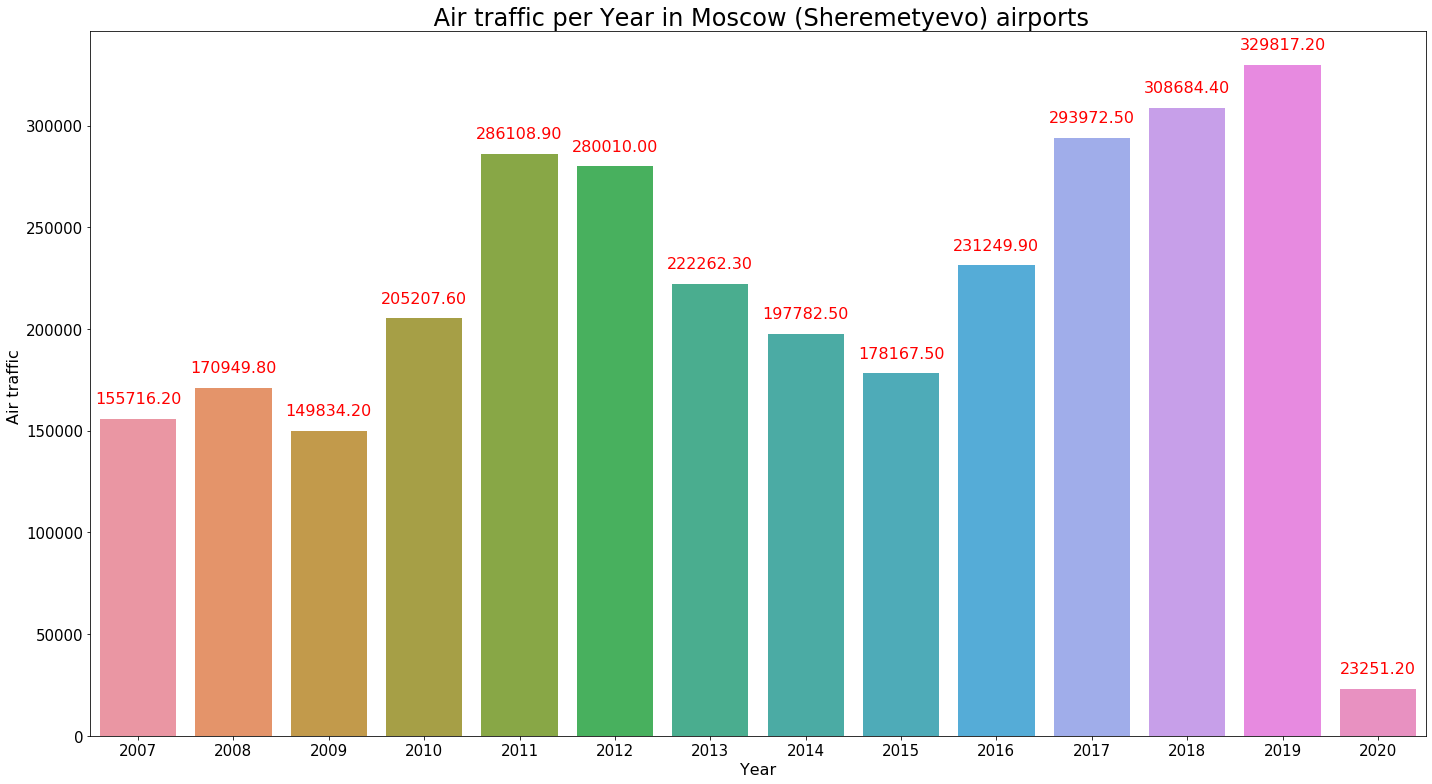

In [33]:


plt.figure(figsize=(20,11))

ax=sns.barplot(data = per_yr, x = 'Year', y = 'air traffic')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Air traffic ', fontsize = 16)
plt.title(" Air traffic per Year in Moscow (Sheremetyevo) airports", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')



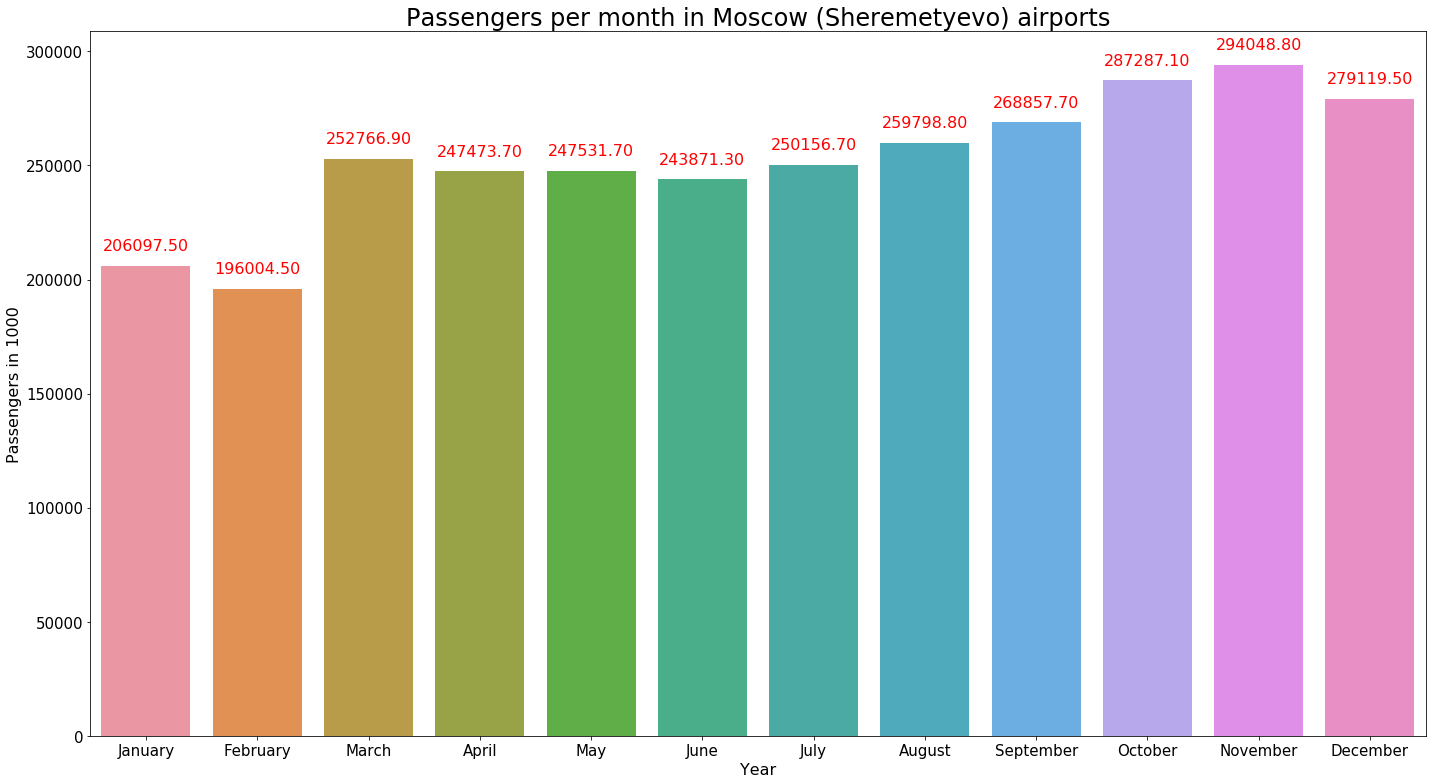

In [34]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = per_mo, x = 'month', y = 'air traffic')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Passengers in 1000', fontsize = 16)
plt.title("Passengers per month in Moscow (Sheremetyevo) airports", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')


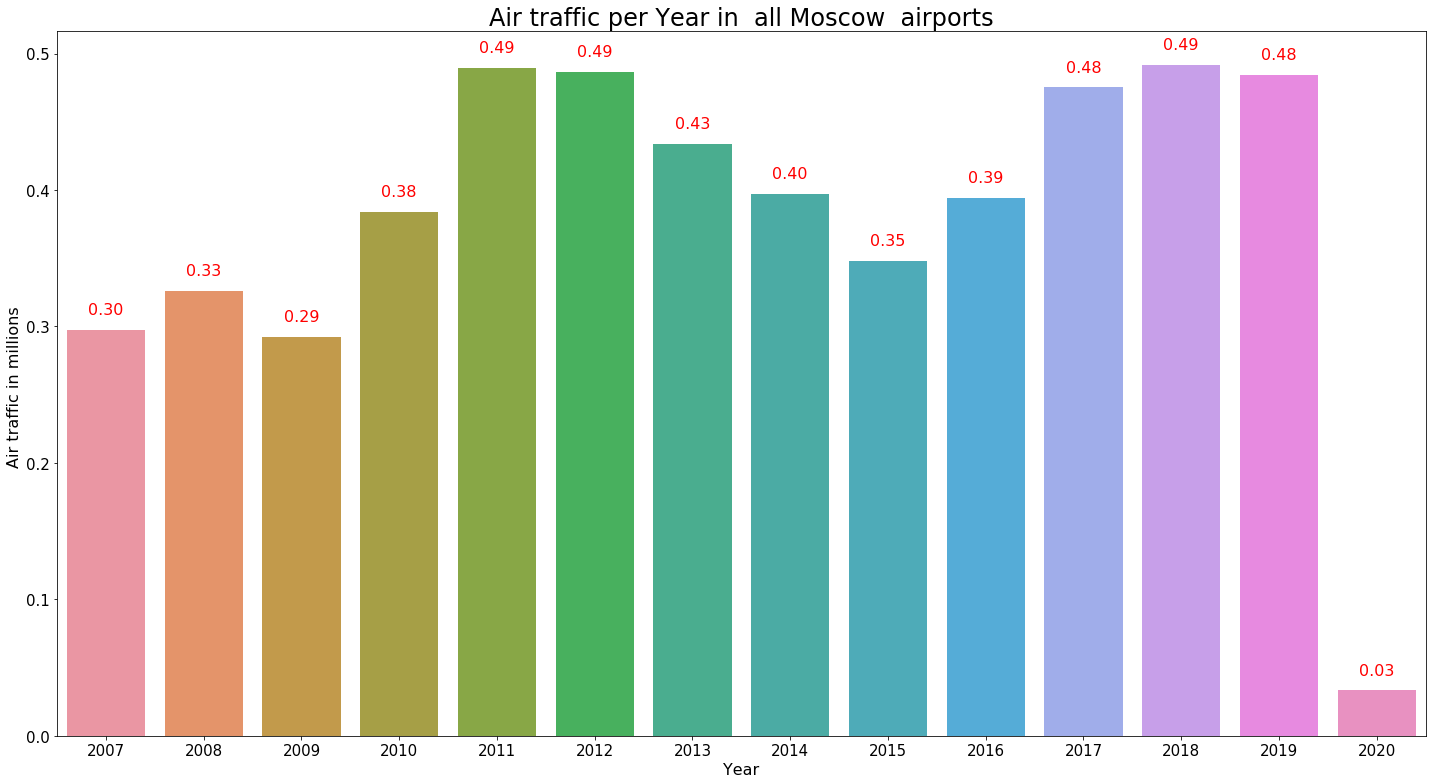

In [35]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = join_yr, x = 'Year', y = 'air traffic')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Air traffic in millions ', fontsize = 16)
plt.title("Air traffic per Year in  all Moscow  airports", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')



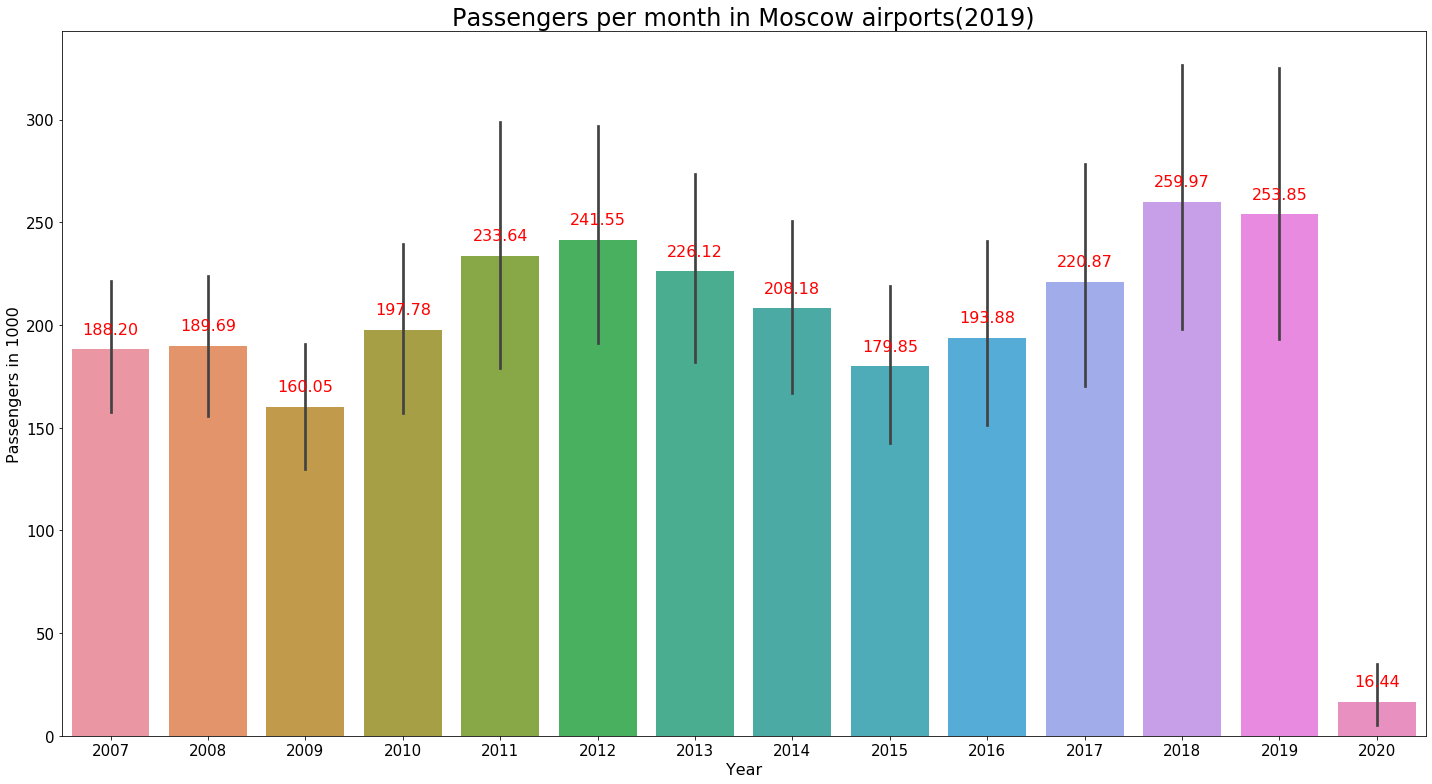

In [36]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data = long, x = 'Year', y = 'air traffic')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Passengers in 1000', fontsize = 16)
plt.title("Passengers per month in Moscow airports(2019)", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')

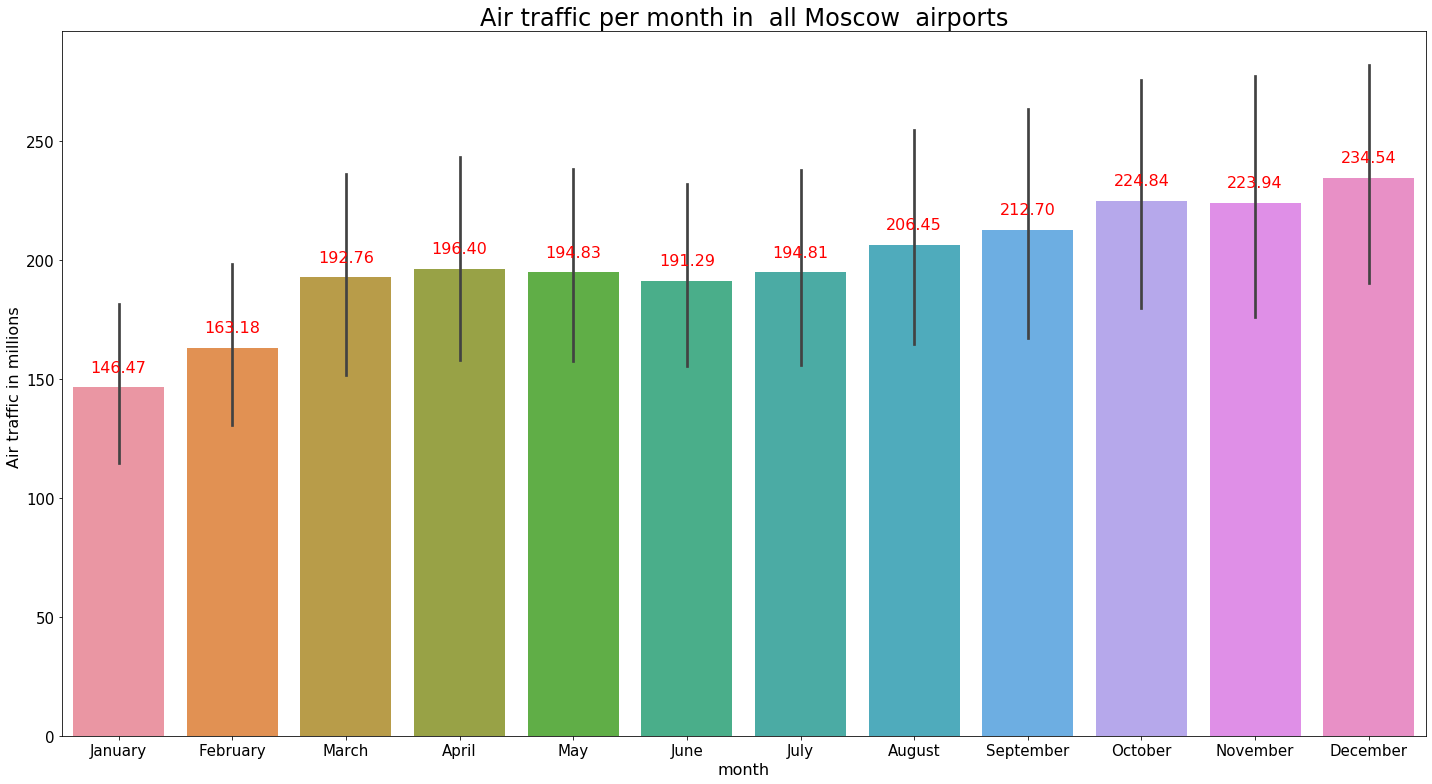

In [39]:
plt.figure(figsize=(20,11))

ax=sns.barplot(data =long , x = 'month', y = 'air traffic')
plt.xlabel('month', fontsize = 16)
plt.ylabel('Air traffic in millions ', fontsize = 16)
plt.title("Air traffic per month in  all Moscow  airports", fontsize = 24)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);
plt.tight_layout()
for p in ax.patches:
             ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=16, color='red', xytext=(0, 20),
                 textcoords='offset points')

In [9]:
ts =  long.groupby(['Year', 'month'])['air traffic'].sum()
ts.to_frame()

air traffic
Year month                 
2007 January       34032.41
     February      45427.90
     March         49521.72
     April         52545.09
     May           52869.26
...                     ...
2020 August            0.00
     September         0.00
     October           0.00
     November          0.00
     December          0.00

[168 rows x 1 columns]

In [10]:
ts = ts.reset_index()

time = range(1,169)
ts['time'] = time                            # create time variable
ts['pasmio'] = ts['air traffic'] / 1000000    # change representation to millions

Text(0.5, 1.0, "Time Series of Russias's airtraffic from 2007-2020")

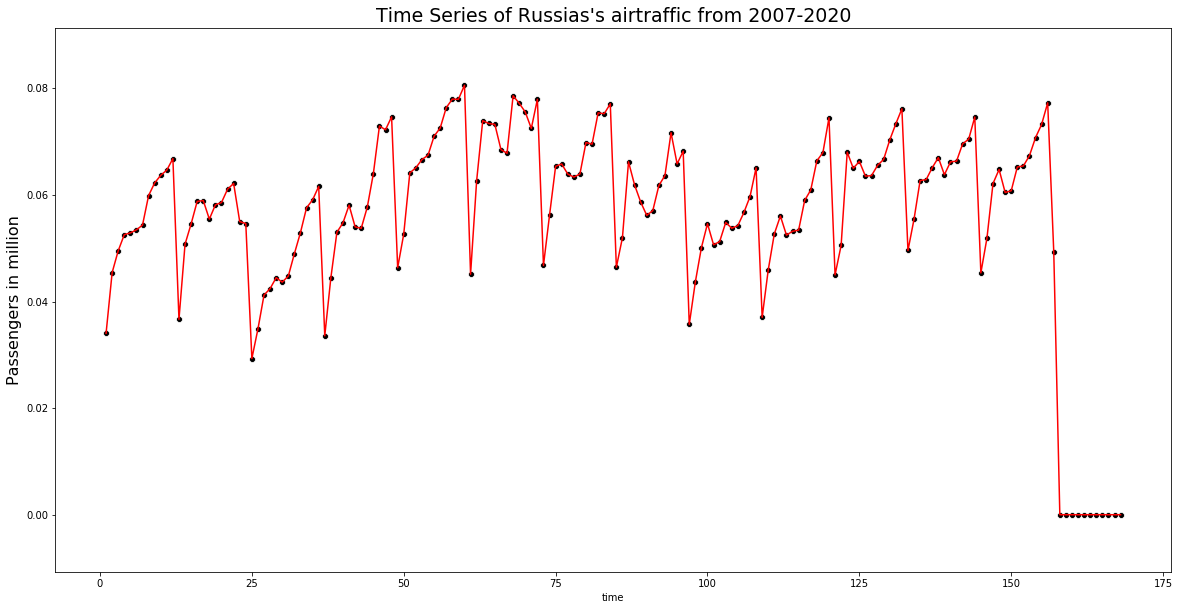

In [11]:
plt.figure(figsize = (20,10))

sns.scatterplot(data = ts, x = 'time', y = 'pasmio', color = 'black')
sns.lineplot(data = ts, x = 'time', y = 'pasmio', color = 'r')
plt.ylabel('Passengers in million', fontsize=  16)
plt.title("Time Series of Russias's airtraffic from 2007-2020", fontsize = 19)